1️⃣ HDBSCAN computes a probability score for each point, showing how strongly it belongs to a cluster.

2️⃣ Higher probability (closer to 1.0) → The point is a strong member of its cluster.

3️⃣ Lower probability (closer to 0.0) → The point is uncertain or could be noise.

In [13]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import hdbscan

from sklearn.datasets import make_moons

In [14]:
X , _ = make_moons(n_samples=500, noise=0.5, random_state=42)

In [15]:
# Apply HDBSCAN clustering

clusterer = hdbscan.HDBSCAN(min_cluster_size=15, 
                            min_samples=10, 
                            cluster_selection_epsilon=0.5
                            
                            )

labels = clusterer.fit_predict(X)

In [16]:
# Extract probability scores

probabilities = clusterer.probabilities_

In [17]:
# Convert to DataFrame for visualization

df = pd.DataFrame(X, columns=['X1', 'X2'])

df['Cluster'] = labels

df['Probability'] = probabilities

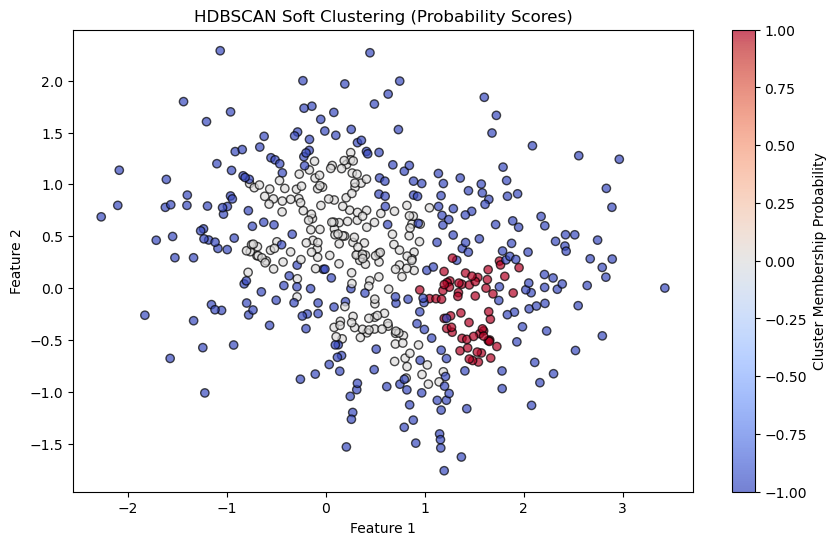

In [18]:
# Plot clusters with probability scores as color

plt.figure(figsize=(10,6))

scatter = plt.scatter(df['X1'],
                      df['X2'], 
                      c=df['Cluster'], 
                      cmap='coolwarm', 
                      edgecolors='k', 
                      alpha=0.7
                      
                      )

plt.colorbar(scatter, 
             label = "Cluster Membership Probability"
            
            )

plt.title("HDBSCAN Soft Clustering (Probability Scores)")

plt.xlabel("Feature 1")

plt.ylabel("Feature 2")

plt.show()

✅ Bright red points → High probability (strong cluster members).

✅ Blue points → Low probability (borderline points or noise).

✅ Faded points → More uncertainty in cluster assignment.

🔹 When to Use Soft Clustering?

🔹 When working with fuzzy, overlapping, or ambiguous clusters.

🔹 When you need confidence scores for decision-making.

🔹 When you want to filter out uncertain points to improve cluster quality.